In [1]:
!pip install numpy pandas matplotlib seaborn
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import re

# Introduction:
# A consistent part of life is stress, especially so for college students. Much like life, stress is complex and can stem from many different factors including those that are psychological, physiological, environmental, and more. The goal of this analysis is to discover if any trends or more knowledge can be ascertained from the two datasets regarding stress factors amongst college students around ages 18 to 21. 
#
# Datasets:
# For this analysis, we will be using "Student Stress Monitoring Datasets", which consists of two datasets that consist of survey data taken from college students nationwide. The first data set contains 20 features: anxiety_level, self_esteem, mental_health_history, depression, headache, blood_pressure, sleep_quality, breathing_problem, noise_level, living_conditions, basic_needs, academic_performance, study_load, teacher_student_relationship, future_career_concerns, social_support, peer_pressure, extracurricular_activities, bullying, stress_level. The second dataset includes features: Gender, Age, Recent_Stress, Have you noticed a rapid heartbeat or palpitations?, Have you been dealing with anxiety or tension recently?, Do you face any sleep problems or difficulties falling asleep?, Have you been dealing with anxiety or tension recently?.1, Have you been getting headaches more often than usual?, Do you get irritated easily?, Do you have trouble concentrating on your academic tasks?, Do you find that your relationship often causes you stress?, Are you facing any difficulties with your professors or instructors?, Is your working environment unpleasant or stressful?, Do you struggle to find time for relaxation and leisure activities?, Is your hostel or home environment causing you difficulties?, Do you lack confidence in your academic performance?, Do you lack confidence in your choice of academic subjects?, Academic and extracurricular activities conflicting for you?, Do you attend classes regularly?, and Have you gained/lost weight?

# Link: https://www.kaggle.com/datasets/mdsultanulislamovi/student-stress-monitoring-datasets/data

In [3]:
stress_raw = pd.read_csv("StressLevelDataset.csv")

In [4]:
stress_raw.describe()

,anxiety_level,self_esteem,mental_health_history,depression,headache,blood_pressure,sleep_quality,breathing_problem,noise_level,living_conditions,...,basic_needs,academic_performance,study_load,teacher_student_relationship,future_career_concerns,social_support,peer_pressure,extracurricular_activities,bullying,stress_level
count,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,...,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000
mean,11.063636,17.777273,0.492727,12.555455,2.508182,2.181818,2.660000,2.753636,2.649091,2.518182,...,2.772727,2.772727,2.621818,2.648182,2.649091,1.881818,2.734545,2.767273,2.617273,0.996364
std,6.117558,8.944599,0.500175,7.727008,1.409356,0.833575,1.548383,1.400713,1.328127,1.119208,...,1.433761,1.414594,1.315781,1.384579,1.529375,1.047826,1.425265,1.417562,1.530958,0.821673
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6.000000,11.000000,0.000000,6.000000,1.000000,1.000000,1.000000,2.000000,2.000000,2.000000,...,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000,2.000000,2.000000,1.000000,0.000000
50%,11.000000,19.000000,0.000000,12.000000,3.000000,2.000000,2.500000,3.000000,3.000000,2.000000,...,3.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.500000,3.000000,1.000000
75%,16.000000,26.000000,1.000000,19.000000,3.000000,3.000000,4.000000,4.000000,3.000000,3.000000,...,4.000000,4.000000,3.000000,4.000000,4.000000,3.000000,4.000000,4.000000,4.000000,2.000000
max,21.000000,30.000000,1.000000,27.000000,5.000000,3.000000,5.000000,5.000000,5.000000,5.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,3.000000,5.000000,5.000000,5.000000,2.000000


In [5]:
stress_raw.isna().sum()

anxiety_level                   0
self_esteem                     0
mental_health_history           0
depression                      0
headache                        0
blood_pressure                  0
sleep_quality                   0
breathing_problem               0
noise_level                     0
living_conditions               0
safety                          0
basic_needs                     0
academic_performance            0
study_load                      0
teacher_student_relationship    0
future_career_concerns          0
social_support                  0
peer_pressure                   0
extracurricular_activities      0
bullying                        0
stress_level                    0
dtype: int64

# Correlation
# With this correlation matrix we are able to identify which features can be linked more closely to stress levels. At a glance we can see that a few factors stand out as being more closely correlated to stress levels such as anxiety, depression, headaches, future career concerns, peer pressure, extracurricular activities, and bullying. It is interesting that these features that stem from within and those that relate to external negative events seem to carry the highest correlation to increased stress levels.

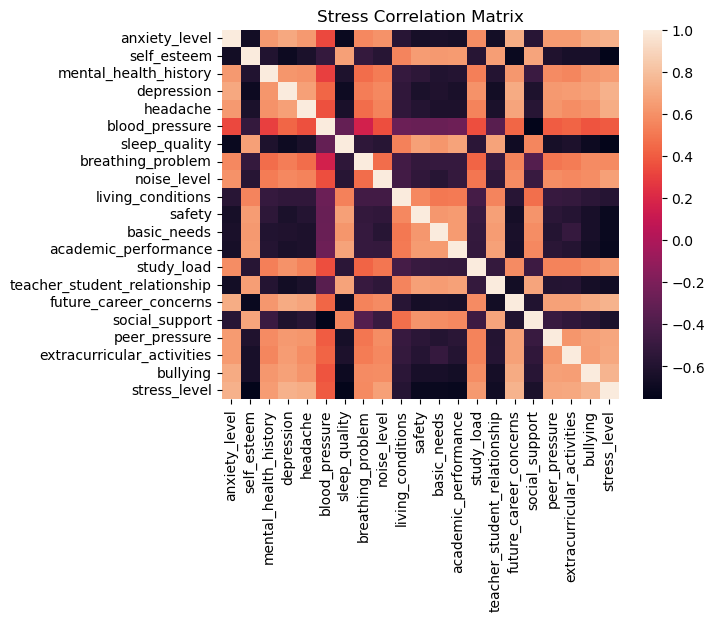

In [7]:
df1 = stress_raw.dropna()
sns.heatmap(df1.corr())
plt.title('Stress Correlation Matrix')
plt.show()

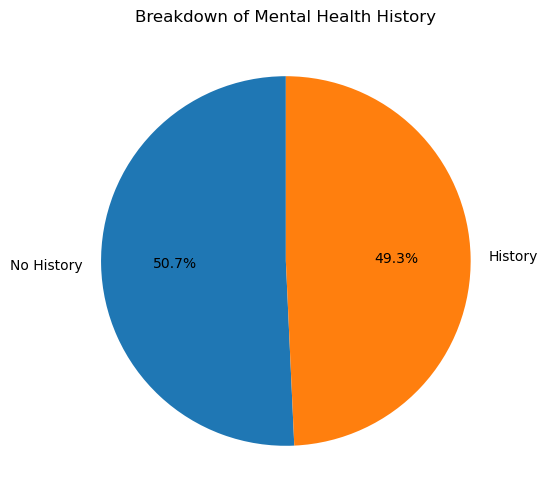

In [8]:
# mental health vs stress levels
mental_health_counts = df1['mental_health_history'].value_counts()
labels = {1:'History', 0:'No History'}
mapped_labels = [labels[val] for val in mental_health_counts.index]

plt.figure(figsize =(8,6))
plt.pie(mental_health_counts, labels=mapped_labels, autopct='%1.1f%%', startangle=90)
plt.title('Breakdown of Mental Health History')
plt.show()

# This pie chart shows that there is very close to a 50/50 split of students in our survey with and without mental health history,
# which should lead to a fair comparison of the two.

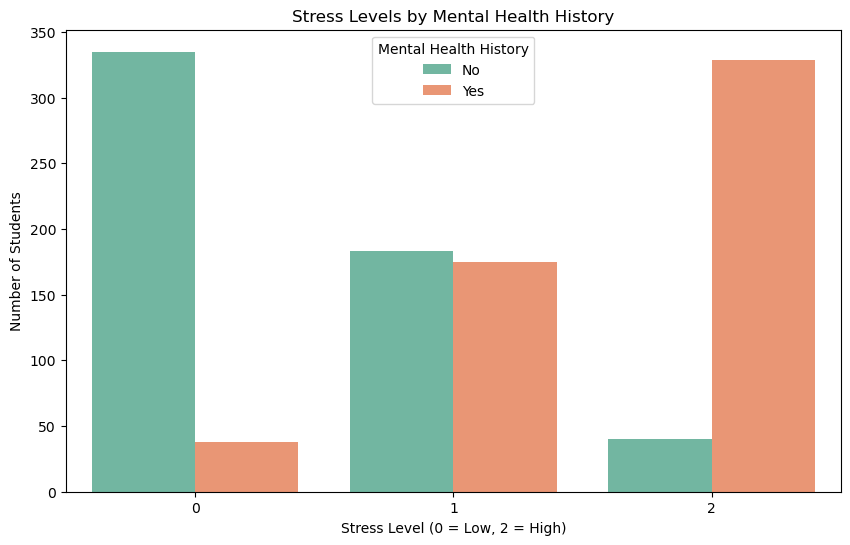

In [9]:
# Stress vs Mental Health History
plt.figure(figsize=(10,6))
df1['Mental Health History'] = df1['mental_health_history'].map({0: 'No', 1: 'Yes'})
sns.countplot(data=df1, x='stress_level', hue='Mental Health History', palette='Set2', dodge=True)

plt.title('Stress Levels by Mental Health History')
plt.xlabel('Stress Level (0 = Low, 2 = High)')
plt.ylabel('Number of Students')

plt.show()

# Judging by this graph, students with mental health history are more prone to higher levels of stress, and the opposite is true for students 
# without mental health history.


C:\Users\Austin\AppData\Local\Temp\ipykernel_40016\4154651252.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df1, x="stress_level", y="future_career_concerns", palette="Set2", cut=0)


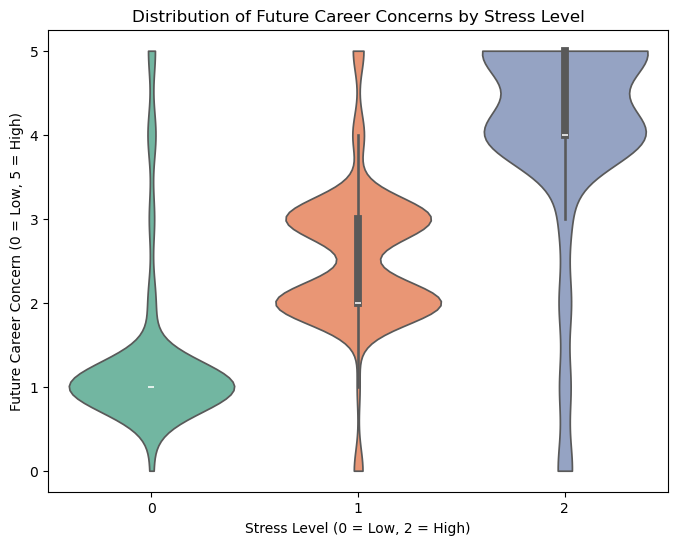

In [10]:
# Stress vs Future Career Concerns
plt.figure(figsize=(8,6))
sns.violinplot(data=df1, x="stress_level", y="future_career_concerns", palette="Set2", cut=0)

plt.title("Distribution of Future Career Concerns by Stress Level")
plt.xlabel("Stress Level (0 = Low, 2 = High)")
plt.ylabel("Future Career Concern (0 = Low, 5 = High)")
plt.show()
# Students who have higher concerns about future employment are typically more stressed

C:\Users\Austin\AppData\Local\Temp\ipykernel_40016\2528738429.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df1, x="stress_level", y="bullying", palette="Set2", cut=0)


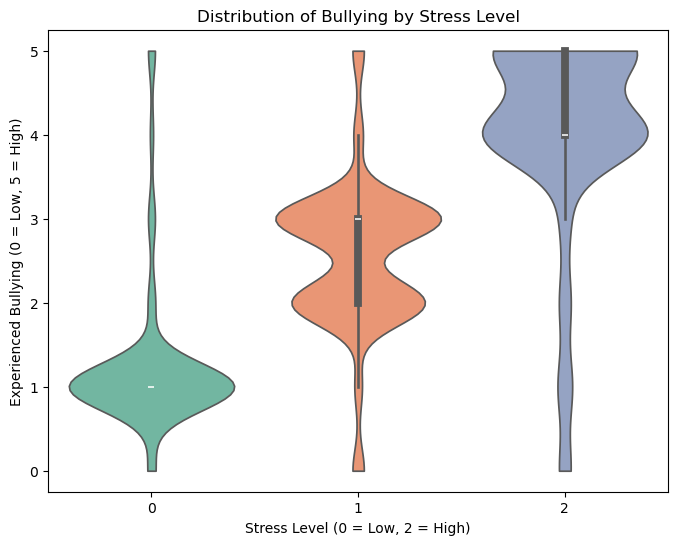

In [11]:
# Stress vs Bullying
plt.figure(figsize=(8,6))
sns.violinplot(data=df1, x="stress_level", y="bullying", palette="Set2", cut=0)

plt.title("Distribution of Bullying by Stress Level")
plt.xlabel("Stress Level (0 = Low, 2 = High)")
plt.ylabel("Experienced Bullying (0 = Low, 5 = High)")
plt.show()
# Students who are bullied are more stressed

C:\Users\Austin\AppData\Local\Temp\ipykernel_40016\1453697505.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df1, x="stress_level", y="peer_pressure", palette="Set2", cut=0)


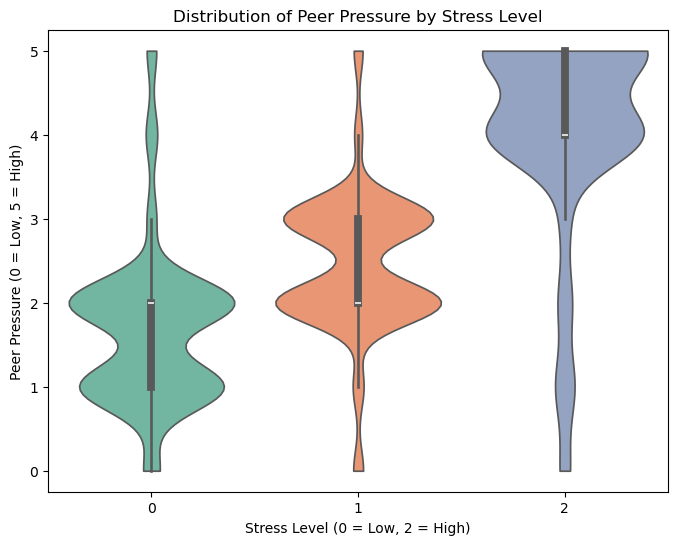

In [12]:
# Stress vs Peer Pressure
plt.figure(figsize=(8,6))
sns.violinplot(data=df1, x="stress_level", y="peer_pressure", palette="Set2", cut=0)

plt.title("Distribution of Peer Pressure by Stress Level")
plt.xlabel("Stress Level (0 = Low, 2 = High)")
plt.ylabel("Peer Pressure (0 = Low, 5 = High)")
plt.show()
# Students who feel pressure from their peers typically exhibit higher levels of stress

C:\Users\Austin\AppData\Local\Temp\ipykernel_40016\155916426.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df1, x="stress_level", y="headache", palette="Set2", cut=0)


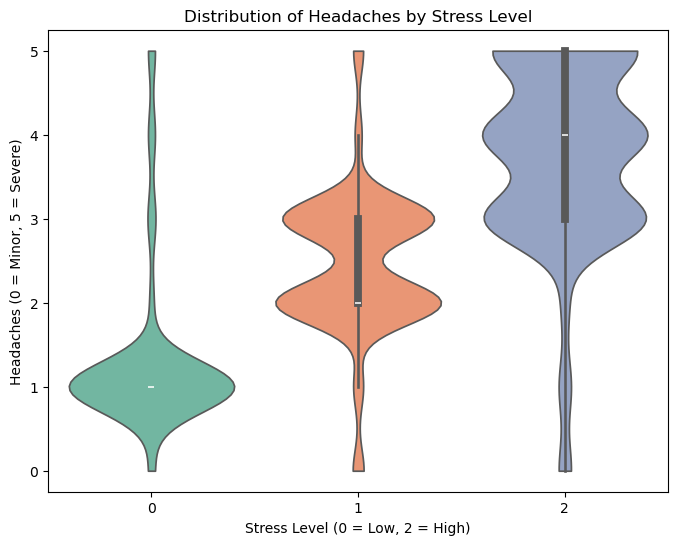

In [13]:
# Stress vs Headaches
plt.figure(figsize=(8,6))
sns.violinplot(data=df1, x="stress_level", y="headache", palette="Set2", cut=0)

plt.title("Distribution of Headaches by Stress Level")
plt.xlabel("Stress Level (0 = Low, 2 = High)")
plt.ylabel("Headaches (0 = Minor, 5 = Severe)")
plt.show()

# Students who are more stressed out experience more severe headaches

C:\Users\Austin\AppData\Local\Temp\ipykernel_40016\3116577385.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df1, x="stress_level", y="academic_performance", palette="Set2", cut=0)


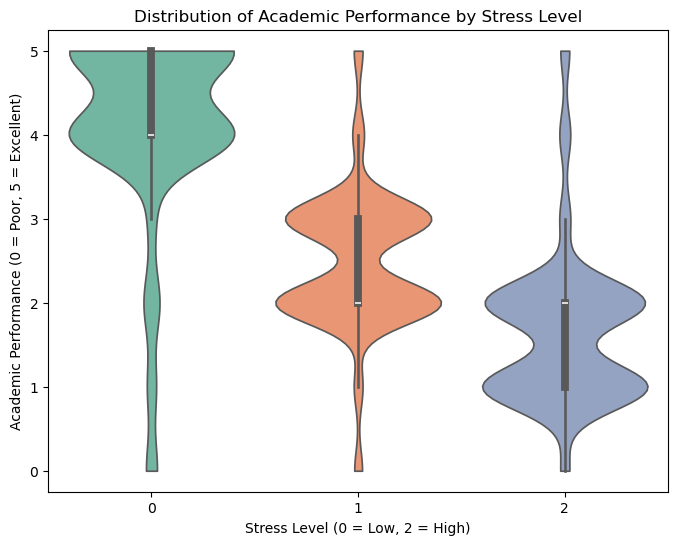

In [14]:
# Stress vs Academic Performance
plt.figure(figsize=(8,6))
sns.violinplot(data=df1, x="stress_level", y="academic_performance", palette="Set2", cut=0)

plt.title("Distribution of Academic Performance by Stress Level")
plt.xlabel("Stress Level (0 = Low, 2 = High)")
plt.ylabel("Academic Performance (0 = Poor, 5 = Excellent)")
plt.show()
# Students who are more stressed typically perform worse academically

In [15]:
# 2nd Dataset - Stress Questionairre
questionairre_raw = pd.read_csv("Stress_Dataset.csv")

In [16]:
questionairre_raw.describe()

,Gender,Age,Have you recently experienced stress in your life?,Have you noticed a rapid heartbeat or palpitations?,Have you been dealing with anxiety or tension recently?,Do you face any sleep problems or difficulties falling asleep?,Have you been dealing with anxiety or tension recently?.1,Have you been getting headaches more often than usual?,Do you get irritated easily?,Do you have trouble concentrating on your academic tasks?,...,Do you find that your relationship often causes you stress?,Are you facing any difficulties with your professors or instructors?,Is your working environment unpleasant or stressful?,Do you struggle to find time for relaxation and leisure activities?,Is your hostel or home environment causing you difficulties?,Do you lack confidence in your academic performance?,Do you lack confidence in your choice of academic subjects?,Academic and extracurricular activities conflicting for you?,Do you attend classes regularly?,Have you gained/lost weight?
count,843.000000,843.000000,843.000000,843.000000,843.000000,843.000000,843.000000,843.000000,843.000000,843.000000,...,843.000000,843.000000,843.000000,843.000000,843.000000,843.000000,843.000000,843.000000,843.000000,843.000000
mean,0.349941,20.071174,2.997628,2.755635,2.543298,2.786477,2.663108,2.628707,2.702254,2.699881,...,2.514828,2.447212,2.488731,2.517200,2.424674,2.581257,2.641756,2.756821,3.258600,2.398577
std,0.477234,5.429502,1.134639,1.118650,1.201330,1.266959,1.266376,1.266593,1.314213,1.313673,...,1.241869,1.195995,1.196116,1.247563,1.256795,1.288163,1.305848,1.263008,1.202543,1.112485
min,0.000000,14.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,19.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,...,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,2.000000,2.000000,2.000000,2.000000
50%,0.000000,19.000000,3.000000,3.000000,2.000000,3.000000,2.000000,2.000000,3.000000,3.000000,...,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,3.000000,2.000000
75%,1.000000,20.000000,4.000000,4.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,...,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,3.000000
max,1.000000,100.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


In [17]:
#one of the features was duplicated in the 2nd dataset, so we need to drop the extra.
questionairre_raw = questionairre_raw.drop(columns=['Have you been dealing with anxiety or tension recently?.1'])
#lets rename these wordy features to just capture the meaning.
questionairre_raw.rename(columns={
    "Gender": "Gender",
    "Age": "Age",
    "Have you recently experienced stress in your life?": "Stress",
    "Have you noticed a rapid heartbeat or palpitations?": "Rapid_Heartbeat",
    "Have you been dealing with anxiety or tension recently?": "Anxiety",
    "Do you face any sleep problems or difficulties falling asleep?": "Sleep_Problems",
    "Have you been getting headaches more often than usual?": "Headaches",
    "Do you get irritated easily?": "Irritability",
    "Do you have trouble concentrating on your academic tasks?": "Concentration",
    "Have you been feeling sadness or low mood?": "Sadness",
    "Have you been experiencing any illness or health issues?": "Health_Issues",
    "Do you often feel lonely or isolated?": "Loneliness",
    "Do you feel overwhelmed with your academic workload?": "Academic_Overload",
    "Are you in competition with your peers, and does it affect you?": "Peer_Competition",
    "Do you find that your relationship often causes you stress?": "Relationship_Stress",
    "Are you facing any difficulties with your professors or instructors?": "Professor_Difficulties",
    "Is your working environment unpleasant or stressful?": "Work_Environment",
    "Do you struggle to find time for relaxation and leisure activities?": "Leisure_Difficulty",
    "Is your hostel or home environment causing you difficulties?": "Home_Environment",
    "Do you lack confidence in your academic performance?": "Academic_Confidence",
    "Do you lack confidence in your choice of academic subjects?": "Subject_Confidence",
    "Academic and extracurricular activities conflicting for you?": "Activities_Conflict",
    "Do you attend classes regularly?": "Attendance",
    "Have you gained/lost weight?": "Weight_Change",
    "Which type of stress do you primarily experience?": "Primary_Stress_Type"
}, inplace=True)
#check for null values
questionairre_raw.isna().sum()

Gender                    0
Age                       0
Stress                    0
Rapid_Heartbeat           0
Anxiety                   0
Sleep_Problems            0
Headaches                 0
Irritability              0
Concentration             0
Sadness                   0
Health_Issues             0
Loneliness                0
Academic_Overload         0
Peer_Competition          0
Relationship_Stress       0
Professor_Difficulties    0
Work_Environment          0
Leisure_Difficulty        0
Home_Environment          0
Academic_Confidence       0
Subject_Confidence        0
Activities_Conflict       0
Attendance                0
Weight_Change             0
Primary_Stress_Type       0
dtype: int64

In [18]:
questionairre_raw.describe()

,Gender,Age,Stress,Rapid_Heartbeat,Anxiety,Sleep_Problems,Headaches,Irritability,Concentration,Sadness,...,Relationship_Stress,Professor_Difficulties,Work_Environment,Leisure_Difficulty,Home_Environment,Academic_Confidence,Subject_Confidence,Activities_Conflict,Attendance,Weight_Change
count,843.000000,843.000000,843.000000,843.000000,843.000000,843.000000,843.000000,843.000000,843.000000,843.000000,...,843.000000,843.000000,843.000000,843.000000,843.000000,843.000000,843.000000,843.000000,843.000000,843.000000
mean,0.349941,20.071174,2.997628,2.755635,2.543298,2.786477,2.628707,2.702254,2.699881,2.584816,...,2.514828,2.447212,2.488731,2.517200,2.424674,2.581257,2.641756,2.756821,3.258600,2.398577
std,0.477234,5.429502,1.134639,1.118650,1.201330,1.266959,1.266593,1.314213,1.313673,1.233290,...,1.241869,1.195995,1.196116,1.247563,1.256795,1.288163,1.305848,1.263008,1.202543,1.112485
min,0.000000,14.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,19.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,...,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,2.000000,2.000000,2.000000,2.000000
50%,0.000000,19.000000,3.000000,3.000000,2.000000,3.000000,2.000000,3.000000,3.000000,2.000000,...,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,3.000000,2.000000
75%,1.000000,20.000000,4.000000,4.000000,3.000000,4.000000,4.000000,4.000000,4.000000,3.000000,...,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,3.000000
max,1.000000,100.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


In [19]:
df2 = questionairre_raw
df2.columns = df2.columns.str.strip()
df2 = df2[df2['Age'].isin([18, 19, 20, 21])]

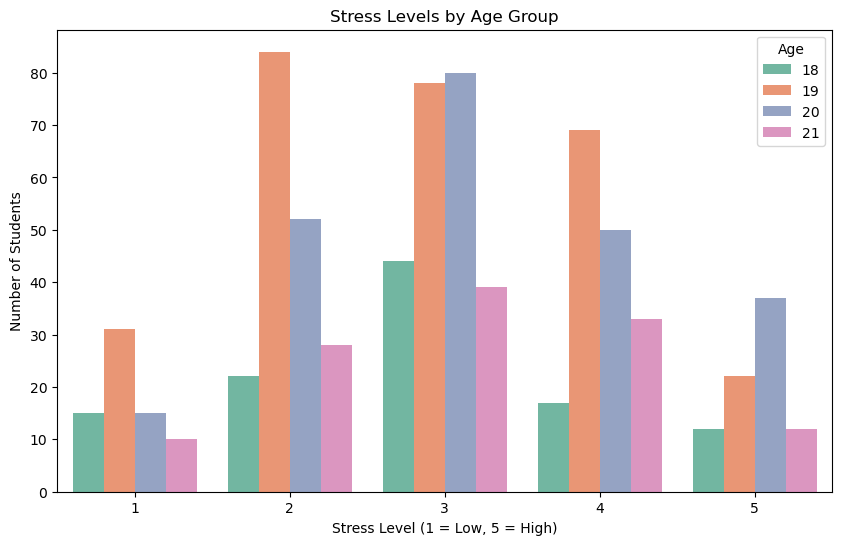

In [20]:
plt.figure(figsize=(10,6))
sns.countplot(data=df2, x='Stress', hue='Age', palette='Set2', dodge=True)

plt.title('Stress Levels by Age Group')
plt.xlabel('Stress Level (1 = Low, 5 = High)')
plt.ylabel('Number of Students')


plt.show()

In [21]:
age_counts = df2['Age'].value_counts().sort_index()
print(age_counts)

Age
18    110
19    284
20    234
21    122
Name: count, dtype: int64


C:\Users\Austin\AppData\Local\Temp\ipykernel_40016\1150022379.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Gender_Label'] = df2['Gender'].map({1: 'Female', 0: 'Male'})


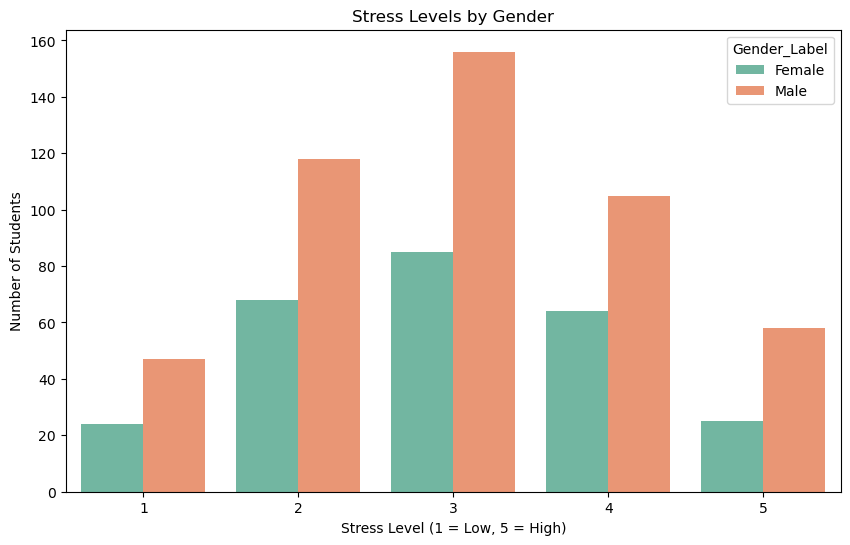

In [26]:
plt.figure(figsize=(10,6))
df2['Gender_Label'] = df2['Gender'].map({1: 'Female', 0: 'Male'})
sns.countplot(data=df2, x='Stress', hue='Gender_Label', palette='Set2', dodge=True)

plt.title('Stress Levels by Gender')
plt.xlabel('Stress Level (1 = Low, 5 = High)')
plt.ylabel('Number of Students')


plt.show()

In [53]:
# Count of Males and Females
gender_counts = df2['Gender_Label'].value_counts()
print(gender_counts)

Gender_Label
Male      484
Female    266
Name: count, dtype: int64


In [32]:
# Stress vs Concentration

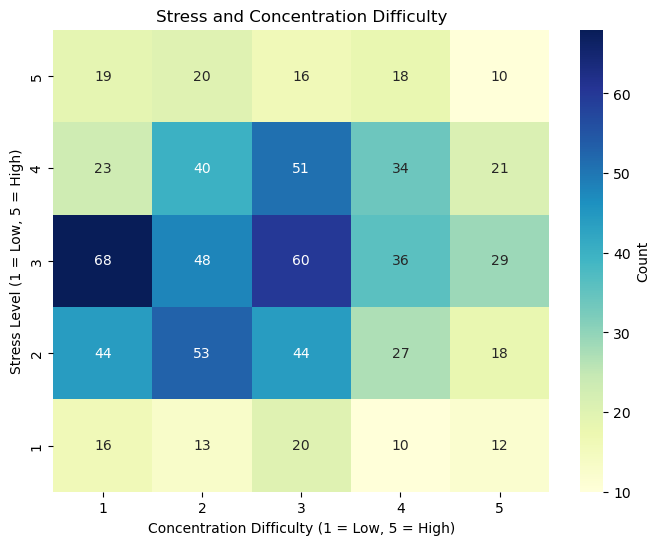

In [35]:
ct = pd.crosstab(df2["Stress"], df2["Concentration"])

plt.figure(figsize=(8,6))
sns.heatmap(ct, annot=True, cmap="YlGnBu", cbar_kws={'label': 'Count'})
plt.title("Stress and Concentration Difficulty")
plt.xlabel("Concentration Difficulty (1 = Low, 5 = High)")
plt.ylabel("Stress Level (1 = Low, 5 = High)")
plt.gca().invert_yaxis()
plt.show()
# The vast majority of people fall somewhere in the middle here, with a trend towards lower to average stress and lower to average concentration
# difficulties.

C:\Users\Austin\AppData\Local\Temp\ipykernel_40016\3794912999.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df2, x="Stress", y="Anxiety", palette="Set2")


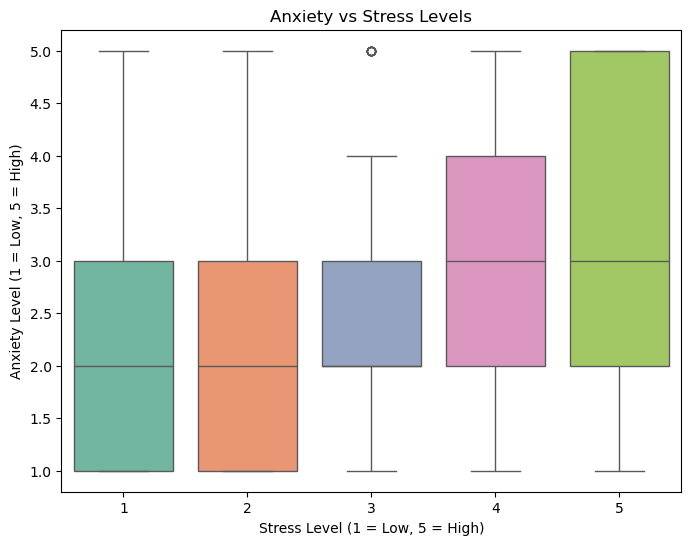

In [55]:
# Stress vs Anxiety
plt.figure(figsize=(8,6))
sns.boxplot(data=df2, x="Stress", y="Anxiety", palette="Set2")
plt.title("Anxiety vs Stress Levels")
plt.xlabel("Stress Level (1 = Low, 5 = High)")
plt.ylabel("Anxiety Level (1 = Low, 5 = High)")
plt.show()

#higher anxiety levels correspond with higher stress levels.

C:\Users\Austin\AppData\Local\Temp\ipykernel_40016\3182434846.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df2, x="Stress", y="Sleep_Problems", palette="Set2")


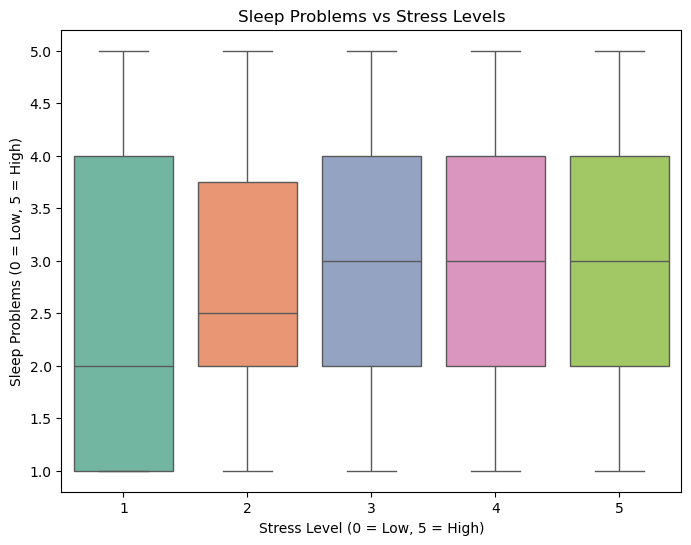

In [46]:
# stress vs sleep issues
plt.figure(figsize=(8,6))
sns.boxplot(data=df2, x="Stress", y="Sleep_Problems", palette="Set2")
plt.title("Sleep Problems vs Stress Levels")
plt.xlabel("Stress Level (0 = Low, 5 = High)")
plt.ylabel("Sleep Problems (0 = Low, 5 = High)")
plt.show()